In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

import pandas as pd

In [22]:
coords = pd.read_csv("datasets/new_bike/set_id_coord.csv")
stations = pd.read_csv('datasets/new_bike/santander_cycles_docking.csv')
stations = stations.drop(columns=['the_geom','cartodb_id', 'type', 'url', 'commonname', 'placetype', 'additionalproperties', 'children', 'childrenurls'])

In [3]:
def reform(x):
    y = x.split(':')
    return [float(y[0]),float(y[1])]

In [4]:
arrival = coords['arrival_coord'].apply(reform).to_list()
dest = coords['departure_coord'].apply(reform).to_list()

coordinates = arrival + dest

lng = [data[0] for data in arrival] + [data[0] for data in dest]
lat = [data[1] for data in arrival] + [data[1] for data in dest]

s_lat = stations['lat'].to_list()
s_lng = stations['lon'].to_list()

s_coordinates = list(zip(s_lat,s_lng))

In [26]:
# Find the minimum and maximum latitude and longitude
for b_lat, b_lon in s_coordinates:
    min_lat = min(min_lat, b_lat)
    max_lat = max(max_lat, b_lat)
    min_lon = min(min_lon, b_lon)
    max_lon = max(max_lon, b_lon)

# The bounding box is represented as (min_lat, min_lon, max_lat, max_lon)
bbox = ((max_lat, min_lon), (min_lat, max_lon))
#bbox = ((min_lon,max_lat),(max_lon,min_lat))
bbox = ((min_lat, min_lon), (max_lat, max_lon))
print("Bounding Box (min_lat, min_lon, max_lat, max_lon):", bbox)


Bounding Box (min_lat, min_lon, max_lat, max_lon): ((51.454752, -0.236769), (51.549369, -0.002275))


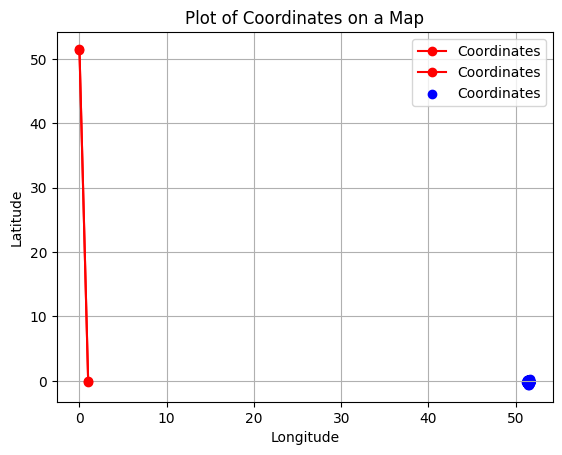

In [27]:
# List of coordinates (latitude and longitude)
#coordinates = [(34.0522, -118.2437), (40.7128, -74.0060), (51.5074, -0.1278)]  # Example coordinates

# Split the coordinates into latitude and longitude lists
#latitudes, longitudes = zip(*coordinates)

# Create a scatter plot
plt.plot(bbox[1], marker='o', color='red', label='Coordinates')
plt.plot(bbox[0], marker='o', color='red', label='Coordinates')
plt.scatter(lat, lng, marker='o', color='blue', label='Coordinates')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Plot of Coordinates on a Map')

# Show the map
plt.grid(True)
plt.legend()
plt.show()


## Dataset Midpoint

In [15]:
coords = pd.read_csv("datasets/new_bike/filtered_dataset_gas.csv")
coords

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ID,crimeNorm,accidentNorm,natureNorm,attractionNorm,durationNorm,trafficNorm,...,crimes,accidents,attractions,nature,traffic,duration,length,coordinates,polution,midpoint
0,0,0,30,30.0,0.920527,0.924528,0.212596,0.000000,1.000000,0.889155,...,310580.0,61.0,0.0,837166.117353,0.936039,1454.0,18727.0,-0.2677:51.533778;-0.2677:51.53326;-0.26763:51...,51,"(51.540285, -0.36924500000000005)"
1,1,1,31,31.0,1.000000,0.490566,0.051620,0.000000,0.995633,1.000000,...,298705.0,84.0,0.0,823320.786870,0.945704,1455.0,17356.0,-0.2677:51.533778;-0.2677:51.53326;-0.26763:51...,51,"(51.542975, -0.378105)"
2,2,2,32,32.0,0.974080,0.471698,0.688265,0.000000,0.877729,0.407789,...,302578.0,85.0,0.0,878077.719383,0.894062,1482.0,17892.0,-0.2677:51.533778;-0.2677:51.53326;-0.26763:51...,51,"(51.541825, -0.374865)"
3,3,3,33,33.0,0.172486,1.000000,0.152550,0.500000,0.000000,0.866310,...,422353.0,57.0,1.0,832001.606618,0.934046,1683.0,19753.0,-0.2677:51.533778;-0.2677:51.53326;-0.26763:51...,35,"(51.53927, -0.36222)"
4,4,4,34,34.0,0.000000,0.924528,0.000000,1.000000,0.344978,0.771865,...,448126.0,61.0,2.0,818881.017743,0.925810,1604.0,19523.0,-0.2677:51.533778;-0.2677:51.53326;-0.26763:51...,35,"(51.53949, -0.363495)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,665,665,3158,3158.0,0.865327,0.905172,0.000000,0.454545,1.000000,0.952936,...,945244.0,157.0,9.0,527463.871935,0.862765,1982.0,13369.0,-0.073976:51.470078;-0.07394:51.46994;-0.07388...,37,"(51.51171, -0.0393)"
666,666,666,3159,3159.0,1.000000,1.000000,0.069511,0.000000,0.984866,1.000000,...,890976.0,146.0,4.0,541806.384165,0.873684,1995.0,13587.0,-0.073976:51.470078;-0.07404:51.47032;-0.07423...,37,"(51.51105, -0.04027)"
667,667,667,3160,3160.0,0.000000,0.482759,1.000000,0.363636,0.000000,0.000000,...,1293936.0,206.0,8.0,733799.038202,0.641675,2841.0,15906.0,-0.073976:51.470078;-0.07394:51.46994;-0.07388...,29,"(51.479420000000005, 0.02195)"
668,668,668,3161,3161.0,0.191761,0.327586,0.284930,0.727273,0.176950,0.343876,...,1216664.0,224.0,12.0,586254.998908,0.721458,2689.0,14609.0,-0.073976:51.470078;-0.07404:51.47032;-0.07423...,30,"(51.50972, -0.05713)"


In [13]:
from haversine import haversine, Unit

def route_midpoint(route_length,zipList):#,latList,lngList):
    middle = delta = route_length/2 # route length was hereResponse['routes'][0]['sections'][0]['summary']['length']/2
    #zipList = list(zip(latList,lngList))
    before = after = None
    dist = 0

    for i in range(len(zipList)-1):
        dist += haversine(zipList[i],zipList[i+1], unit=Unit.METERS)
        sub = abs(middle-dist)
        if sub < delta:
            delta = sub
            before = zipList[i+1]
        if sub > delta:
            after = zipList[i+1]
            break

    #midpointCoord = ((before[0]+after[0])/2,(before[1]+after[1])/2)
    midpoint = f'{(before[0]+after[0])/2},{(before[1]+after[1])/2}'

    return midpoint

In [14]:
def apply_midpoint(row):
    polyline = row['coordinates'].replace(':',',').split(';')
    distance = row['length']
    treated_polyline = []
    for i in polyline:
        j = i.split(',')
        treated_polyline.append((float(j[1]),float(j[0])))
    return route_midpoint(distance,treated_polyline)


In [16]:
coords['midpoint'] = coords.apply(apply_midpoint, axis=1)
#coords['midpoint'] = coords['midpoint'].apply(lambda x:x.apply(eval))

coords.to_csv("datasets/new_bike/filtered_dataset_gas.csv")